# Instructions {-}

1. Download the provided jupyter notebook file to your computer.
2. Write all your answers and code into this notebook file.
3. When your work is completed, export your notebook to an HTML file.
4. Submit your HTML file and a copy of the notebook to the assignment page on Moodle.



## Identification {-}

### Your Information {-}

Your Last Name:
Latrofa

Your First Name:
Ania

### Group Members (list any classmates you worked with on this problem set) {-}

Your Group Members:

In [1]:
# Loading initial packages
import pandas as pd
import numpy as np
from IPython.display import Image
# Packages for running a linear regression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from plotnine import *

# Problem 1 - Estimating Impacts with Ordinary Least Squares {-}

You are in charge of evaluating the impact of a program at your organization aimed at increasing the number of steps people take per day. You have designed and implemented a randomized control trial (RCT), where you track peoples’ steps with a pedometer for 3 initial weeks. After this tracking period, participants in the study were divided into a treatment and control group. The treatment group got a push notification on their phone telling them their average step count over the initial weeks, while no message was sent to the control group. You then recorded total steps after 1 additional week from when this notification was sent out.

The data set `Steps.csv` contains the data from the study. It includes the following variables:

* `treatment` – a binary indicator of whether a participant was in the treatment or control group
* `BaselineSteps` – the total number of steps recorded after the initial 3 weeks
* `PostSteps` – the total number of steps recorded after 4 weeks. Note, this value includes the BaselineSteps, plus the additional steps taken in the final week (after treatment was administered)
* `StepChange` – the change in steps between the `PostSteps` and `BaselineSteps` measurements. This is equal to the number of new steps taken in the final week of the program

Your boss wants to know whether the program had an impact on the outcome of interest (`StepChange`). One way you could analyze this question is by running a linear regression. This question walks you through how you can run and report this type of regression in python.

First, read in the data set and explore the structure and the variables.

In [2]:
# Your code here:
steps = pd.read_csv('/Users/anialatrofa/Desktop/London School of Economics/Y1/AT/Study Material/PP422/Python/Data/W5 Steps.csv')
steps.head(20)

,treatment,BaselineSteps,PostSteps,StepChange
0,0,21396,63511,42115
1,0,21340,37460,16120
2,0,23912,59136,35224
3,0,16862,59292,42430
4,1,147738,167895,20157
5,0,18780,49811,31031
6,1,41930,80323,38393
7,1,28993,63707,34714
8,0,78382,127817,49435
9,1,58500,81081,22581


In [3]:
steps.describe()

,treatment,BaselineSteps,PostSteps,StepChange
count,11363.000000,11363.000000,11363.000000,11363.000000
mean,0.471266,72861.145032,97812.924140,24951.779108
std,0.499196,44174.150732,46400.792592,14419.315468
min,0.000000,10001.000000,10800.000000,10.000000
25%,0.000000,37490.500000,62609.000000,12299.000000
50%,0.000000,64400.000000,90069.000000,25108.000000
75%,1.000000,100000.000000,127213.000000,37419.000000
max,1.000000,199938.000000,245951.000000,49997.000000


In [4]:
steps.dtypes

treatment        int64
BaselineSteps    int64
PostSteps        int64
StepChange       int64
dtype: object

In [5]:
steps.shape

(11363, 4)

In [6]:
steps.columns

Index(['treatment', 'BaselineSteps', 'PostSteps', 'StepChange'], dtype='object')

When you are ready to run your regression please follow these instructions.

## 1-A Loading in statsmodels {-}

Python's `statsmodels` library has useful functions for running simple regressions. You can load two different syntaxes for running regressions with the following code:

```python
import statsmodels.api as sm
import statsmodels.formula.api as smf
```

And if you need to install the packages for the first time you can run the following:
```python
pip install statsmodels
```

The `statsmodels.formula.api` library allows you to run a regression by writing a formula, whereas the standard `statsmodels.api` allows you to pass specific matrix objects in your argument. In general, I prefer using the formula approach and this walk-thorugh will demonstrate that approach.

You can read more examples and specific documentation for `statsmodels` [here](https://www.statsmodels.org/stable/index.html).

In [7]:
# Load in the statsmodels packages by running the code provided above
import statsmodels.api as sm
import statsmodels.formula.api as smf

## 1-B Running a Simple Regression {-}

The formula notation allows you to specify an outcome (or dependent) variable $y$ in the regression and the various independent variables you would like to regress the outcome variable on. If $x1, x2, x3$ are all independent variables, the general formula notation is to write 'y ~ x1 + x2 + x3'. We provide a string with this formula, along with a provided data set. However, rather than use variables like $y$, we provide the relevant column names from our DataFrame.

We can use the following code to run and save the results of our regression, using the above data (assuming it is saved in variable named `steps`):

```python
reg1b = smf.ols('StepChange ~ treatment', data=steps).fit()
```

First, let's examine this code line by line.

1. `smf.ols()` is a function to fit an ordinary least squares (OLS) model. This function is contained in the `statsmodels.formula.api` package, which we saved with the alias `smf`
2. 'StepChange ~ treatment' is the regression formula we would like to run. We are regressing the variable `StepChange` on another variable `treatment`. These variable names must match the column names in our data set
3. smf.ols('StepChange ~ treatment', data=steps) provides both the formula string and the dataset (`steps`) to the `smf.ols()` function
4. The `.fit()` method at the end of the code above tells python to explicitly fit the model we provided. By itself, the `smf.ols()` function just creates a regression object based on the formula and data we provide. There are many things we could potentially do with this model object, one of which is to actually fit (estimate) the model itself. The `.fit()` method will do this.
5. Lastly, the fitted model is saved in a variable `reg1b`

Note how we have to call the `.fit()` method explicitly to fit the model. This is an extra step that you generally do not have to do in languages like R/Stata.

After we have fit the above model, the results are stored in a variable `reg1b`. There are many different things stored in this object (individual $\beta$ estimates, standard errors, various statistical tests, etc.). We can print a formatted summary of the results of our regression with the following command:

```python
print(reg1b.summary())
```

Following the above guidance, fit a regression model examining the relationship between `StepChange` and `Treatment`. Examine your output and answer your boss's previous question: did the program have an impact on the outcome of interest? Justify your explanation by interpreting specific numbers from your regression output.



In [8]:
# Your regression code here:
reg1b = smf.ols('StepChange ~ treatment', data=steps).fit()
print(reg1b.summary())

                            OLS Regression Results                            
Dep. Variable:             StepChange   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     107.3
Date:                Tue, 09 Dec 2025   Prob (F-statistic):           5.06e-25
Time:                        15:12:40   Log-Likelihood:            -1.2489e+05
No. Observations:               11363   AIC:                         2.498e+05
Df Residuals:                   11361   BIC:                         2.498e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.364e+04    185.165    127.645      0.0

_Your explanation here:_

The OLS regression results indicate that the variable _treatment_ (hence, the programme) had a statistically significant effect on the dependent variable _StepChange_. The coefficient for the _treatment_ variable is around `2793`, suggesting that programme participants recorded, on average, approximately 2793 more steps compared to the control group, holding all else constant.

The statistical significance of this effect is supported by:
- The high t-value (`10.36`) indicates that the coefficient is more than 10 times larger than its standard error;
- The extremely low p-value (`p < 0.001`) confirms significance at the 1% level;
- The 95% confidence interval `[2264.70, 3322.12]` does not include zero, further reinforcing the evidence of a positive effect.

Turning beyond examining statistical significance, do you think the magnitude of the measured effect from your regression above is practically important? You may assess magnitude by looking for comparison values both within this data set but also external data you may find related to the problem.

## 1-C Relative Magnitude of Your Findings {-}

Turning beyond examining statistical significance, do you think the magnitude of the measured effect from your regression above is practically important? You may assess magnitude by looking for comparison values both within this data set but also external data you may find related to the problem.

_Your explanation here:_

The measured effect of 2,793 additional steps is practically important from a public health perspective. However, the high unexplained variance suggests there's substantial room for improvement in identifying who benefits most and optimizing the programme design. Further detailed analysis could provide additional insights into the programme's practical value.

# Problem 2 - Benford's Law {-}

We studied the case of the 2009 Iranian elections in class. We discussed that the observed distribution of last digits deviated from what we would have expected if all digits were equally likely. An important lesson from class is that to properly detect this difference statistically, we could not rely on testing only whether the proportion of vote counts that ended in the digit “7” was different than 10% because this would constitute cherry-picking. Instead, we needed to conduct a test that would allow us to test whether the __entire distribution__ of last digits followed the discrete uniform distribution (e.g. whether all the proportions were statistically undistinguishable from 10%). The test we used was a chi-square test. This problem set question asks you to conduct a chi-squared test, but this time we will not assume probabilities are equally likely.

Many types of numerical data exhibit digit patterns that are not uniform. A famous example is "Benford's Law," which finds that for many naturally occurring data, __first__ digits tend to occur with the following relative frequencies.

| First Digit | Frequency |
| ----------- | --------- |
| 1           | 30.1%     |
| 2           | 17.6%     |
| 3           | 12.5%     |
| 4           | 9.7%      |
| 5           | 7.9%      |
| 6           | 6.7%      |
| 7           | 5.8%      |
| 8           | 5.1%      |
| 9           | 4.6%      |

One case in which people applied this rule was in King's County, NY. The District Attorney's office investigated potential fraud in tax filings among businesses and found the following pattern of first digits in 100 income numbers on various tax returns:

| First Digit | Frequency |
| ----------- | --------- |
| 1           | 20%       |
| 2           | 23%       |
| 3           | 12%       |
| 4           | 10%       |
| 5           | 18%       |
| 6           | 13%       |
| 7           | 1%        |
| 8           | 3%        |
| 9           | 0%        |

We want to determine whether or not these returns could be explained by sampling variation by testing whether the distribution of first digits in the 100 tax returns follows Benford’s law. Following the general approach from the Class 9 Handout, you will use a Chi-squared test to do this.

## 2-A {-}

Following the formula from the handout from Class 9, calculate the $\chi^2$ test statistic for this data. Be sure to conduct your calculations in terms of observed and expected counts (not proportions).

In [9]:
# Your calculation here
tax_observed = np.array([20, 23, 12, 10, 18, 13, 1, 3, 0])
tax_expected = np.array([30.1, 17.6, 12.5, 9.7, 7.9, 6.7, 5.8, 5.1, 4.6])

tax_chisqrd = (((tax_observed - tax_expected)**2)/tax_expected).sum()
print(f"The χ² test statistic for the given data is: {tax_chisqrd:.3f}")

The χ² test statistic for the given data is: 33.349


## 2-B {-}

The test statistic you calculated above can be evaluated relative to a $\chi^2$ distribution. Under the null hypothesis, our observed test statistic would follow a $\chi^2$ distribution with $9-1 = 8$ degrees of freedom (note the difference in the degrees of freedom between this example and the example of the Iranian election. Here we are looking at the values for the _first_ digit, and thus there are only 9 possible groups).

You can load the `chi2` function from the `scipy.stats` library to calculate probabilities for a Chi-squared distribution with the following code.

```python
from scipy.stats import chi2
```

Much like the `norm.cdf()` methods you have seen, the `chi2` function has `chi2.sf()` and `chi2.cdf()` methods. Use these methods to calculate the probability of observing a $\chi^2$ test statistic at least as large as what you calculated in Part A. These functions will require a second argument for the degrees of freedom, which in general is equal to $k-1$ where $k$ is the distinct number of categories your data could fall into.

In [10]:
from scipy.stats import chi2

In [11]:
prob_chi = chi2.cdf(tax_chisqrd, 8)
print(f"The probability of observing a χ² test statistic at least as large as {tax_chisqrd:.3f} is: {prob_chi:.5f}")

The probability of observing a χ² test statistic at least as large as 33.349 is: 0.99995


## 2-C OPTIONAL {-}

The scipy.stats package contains another function `chisquare()` which can calculate the same values you calculated in the earlier parts of this problem. Read the documentation for this function and implement it. Do your results match your hand calculation from the earlier parts of this problem?

Note, you may read in the function with the following code
```python
from scipy.stats import chisquare
```

And you may then consult the documentation for this function by typing:
```python
help(chisquare)
```

In [12]:
from scipy.stats import chisquare
help(chisquare)

Help on function chisquare in module scipy.stats._stats_py:

chisquare(f_obs, f_exp=None, ddof=0, axis=0, *, sum_check=True)
    Perform Pearson's chi-squared test.

    Pearson's chi-squared test [1]_ is a goodness-of-fit test for a multinomial
    distribution with given probabilities; that is, it assesses the null hypothesis
    that the observed frequencies (counts) are obtained by independent
    sampling of *N* observations from a categorical distribution with given
    expected frequencies.

    Parameters
    ----------
    f_obs : array_like
        Observed frequencies in each category.
    f_exp : array_like, optional
        Expected frequencies in each category. By default, the categories are
        assumed to be equally likely.
    ddof : int, optional
        "Delta degrees of freedom": adjustment to the degrees of freedom
        for the p-value.  The p-value is computed using a chi-squared
        distribution with ``k - 1 - ddof`` degrees of freedom, where ``k``
    

In [13]:
# Your answer here
result = chisquare(f_obs=tax_observed)
chi_stat = float(result.statistic)

print(f"The χ² test statistic for the given data is:: {chi_stat:.3f}")

The χ² test statistic for the given data is:: 50.840


# Problem 3 - ISLP Exercise 3.4 {-}

You collect a set of data (n = 100 observations) containing a single quantitative predictor $X$ and a single quantitative response $Y$. You then fit the following two models to the data:

1. `Linear regression`: $Y = \beta_0 + \beta_1 X + \epsilon$
2. `Cubic regression`: $Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3 + \epsilon$ 

Recall for this problem that the residual sum of squares (RSS) is defined as:

$$RSS = \sum_{i=1}^n (y_i - \hat{y}_i)^2$$

## 3-A {-}

Suppose that the __true__ relationship between $X$ and $Y$ is linear, and not cubic (_i.e._ $Y = \beta_0 + \beta_1 X + \epsilon$)  Consider the residual sum of squares (RSS) for the `linear regression` and the RSS for the `cubic regression` you run in your sample of observations. Would we expect one to be lower than the other, would we expect these values to be the same, or is there not enough information to tell? Explain your reasoning.

_Your answer and explanation here:_

The RSS for the cubic regression can be lower than or equal to the one for the linear regression:
- The two RSS will be equal in the unique (and rare) case that both $β_2$ and $β_3$ are equal to 0;
- The cubic regression's RSS will be lower in almost all cases, because it contains more parameters.

## 3-B {-}

Suppose that the true relationship between $X$ and $Y$ is not linear, but we don’t know how far it is from linear. Consider the RSS for the `linear regression`, and also the RSS for the `cubic regression` you run in your sample of observations. Would we expect one to be lower than the other, would we expect them to be the same, or is there not enough information to tell? Justify your answer.

_Your answer and explanation here:_

In this case, we would expect the RSS from the cubic regression to be less than or equal to the RSS from the linear regression, for the same reasons explained above.

# Problem 4 - Code Review {-}

A good way to continue to improve your coding skills is to actively review and reflect upon approaches taken by others to solve the same problem. Please do __one__ of the following: 

1. If you have not already done so, take the time to review the suggested solutions from the previous problem sets and compare these solutions to your code for that problem (particularly a problem you found difficult or felt like your approach would not scale)
2. Meet with another student in the course and compare your code for a specific python question from one of the earlier problem sets that you both found to be challenging. 

After this review, please briefly describe one new python approach or function you learned and when / how you could use this approach in the future.

_Your answer here:_

Reviewing the past Problem Set, I realized that I have made some quite relevant mistakes in point 1: I got the code wrong (due to a wrong understanding/implementation of the formula) and from there my analysis was compromised. Reviewing the correct Problem Set has helped me understand how to tackle more appropriately questions on Hypothesis Testing, knowledge that I believe I will be using quite often in the future problem sets that require statistical analysis.

# Problem 5 - Plotting Review {-}

The act of creating visualizations for data should be an iterative process; both in terms of testing different presentation aesthetics and in exploring what relationships may exist in the data that you may not have displayed in your initial findings and what features your approach could be concealing. Select a plot you made in a previous problem set that you would like to revisit and compare your approach on that exercise with that of your classmates. After your review, generate an updated plot that could be "publishable" (that is, a plot that is well labeled and clear and could appear in an industry or research report).

Include a copy of your plot here and briefly explain why you made the changes you did.

I worked together with Anirudh and we confronted our graphs from Problem Set 4, question 3-C _Visualizing Education and Employment Rates_. Below I show my original graph and my updated graph, based on what my classmate did:
- I changed various visual features, as his layout makes it easier to compare different levels of education;
- I showed the columns as horizontal bars, to make the comparison more spacious;
- I divided the different population groups in individual graphs, so the overall impact is not too chaotic.

This time, instead of grouping the data by education level, I grouped it by population groups, with each color simbolizing a different education level.

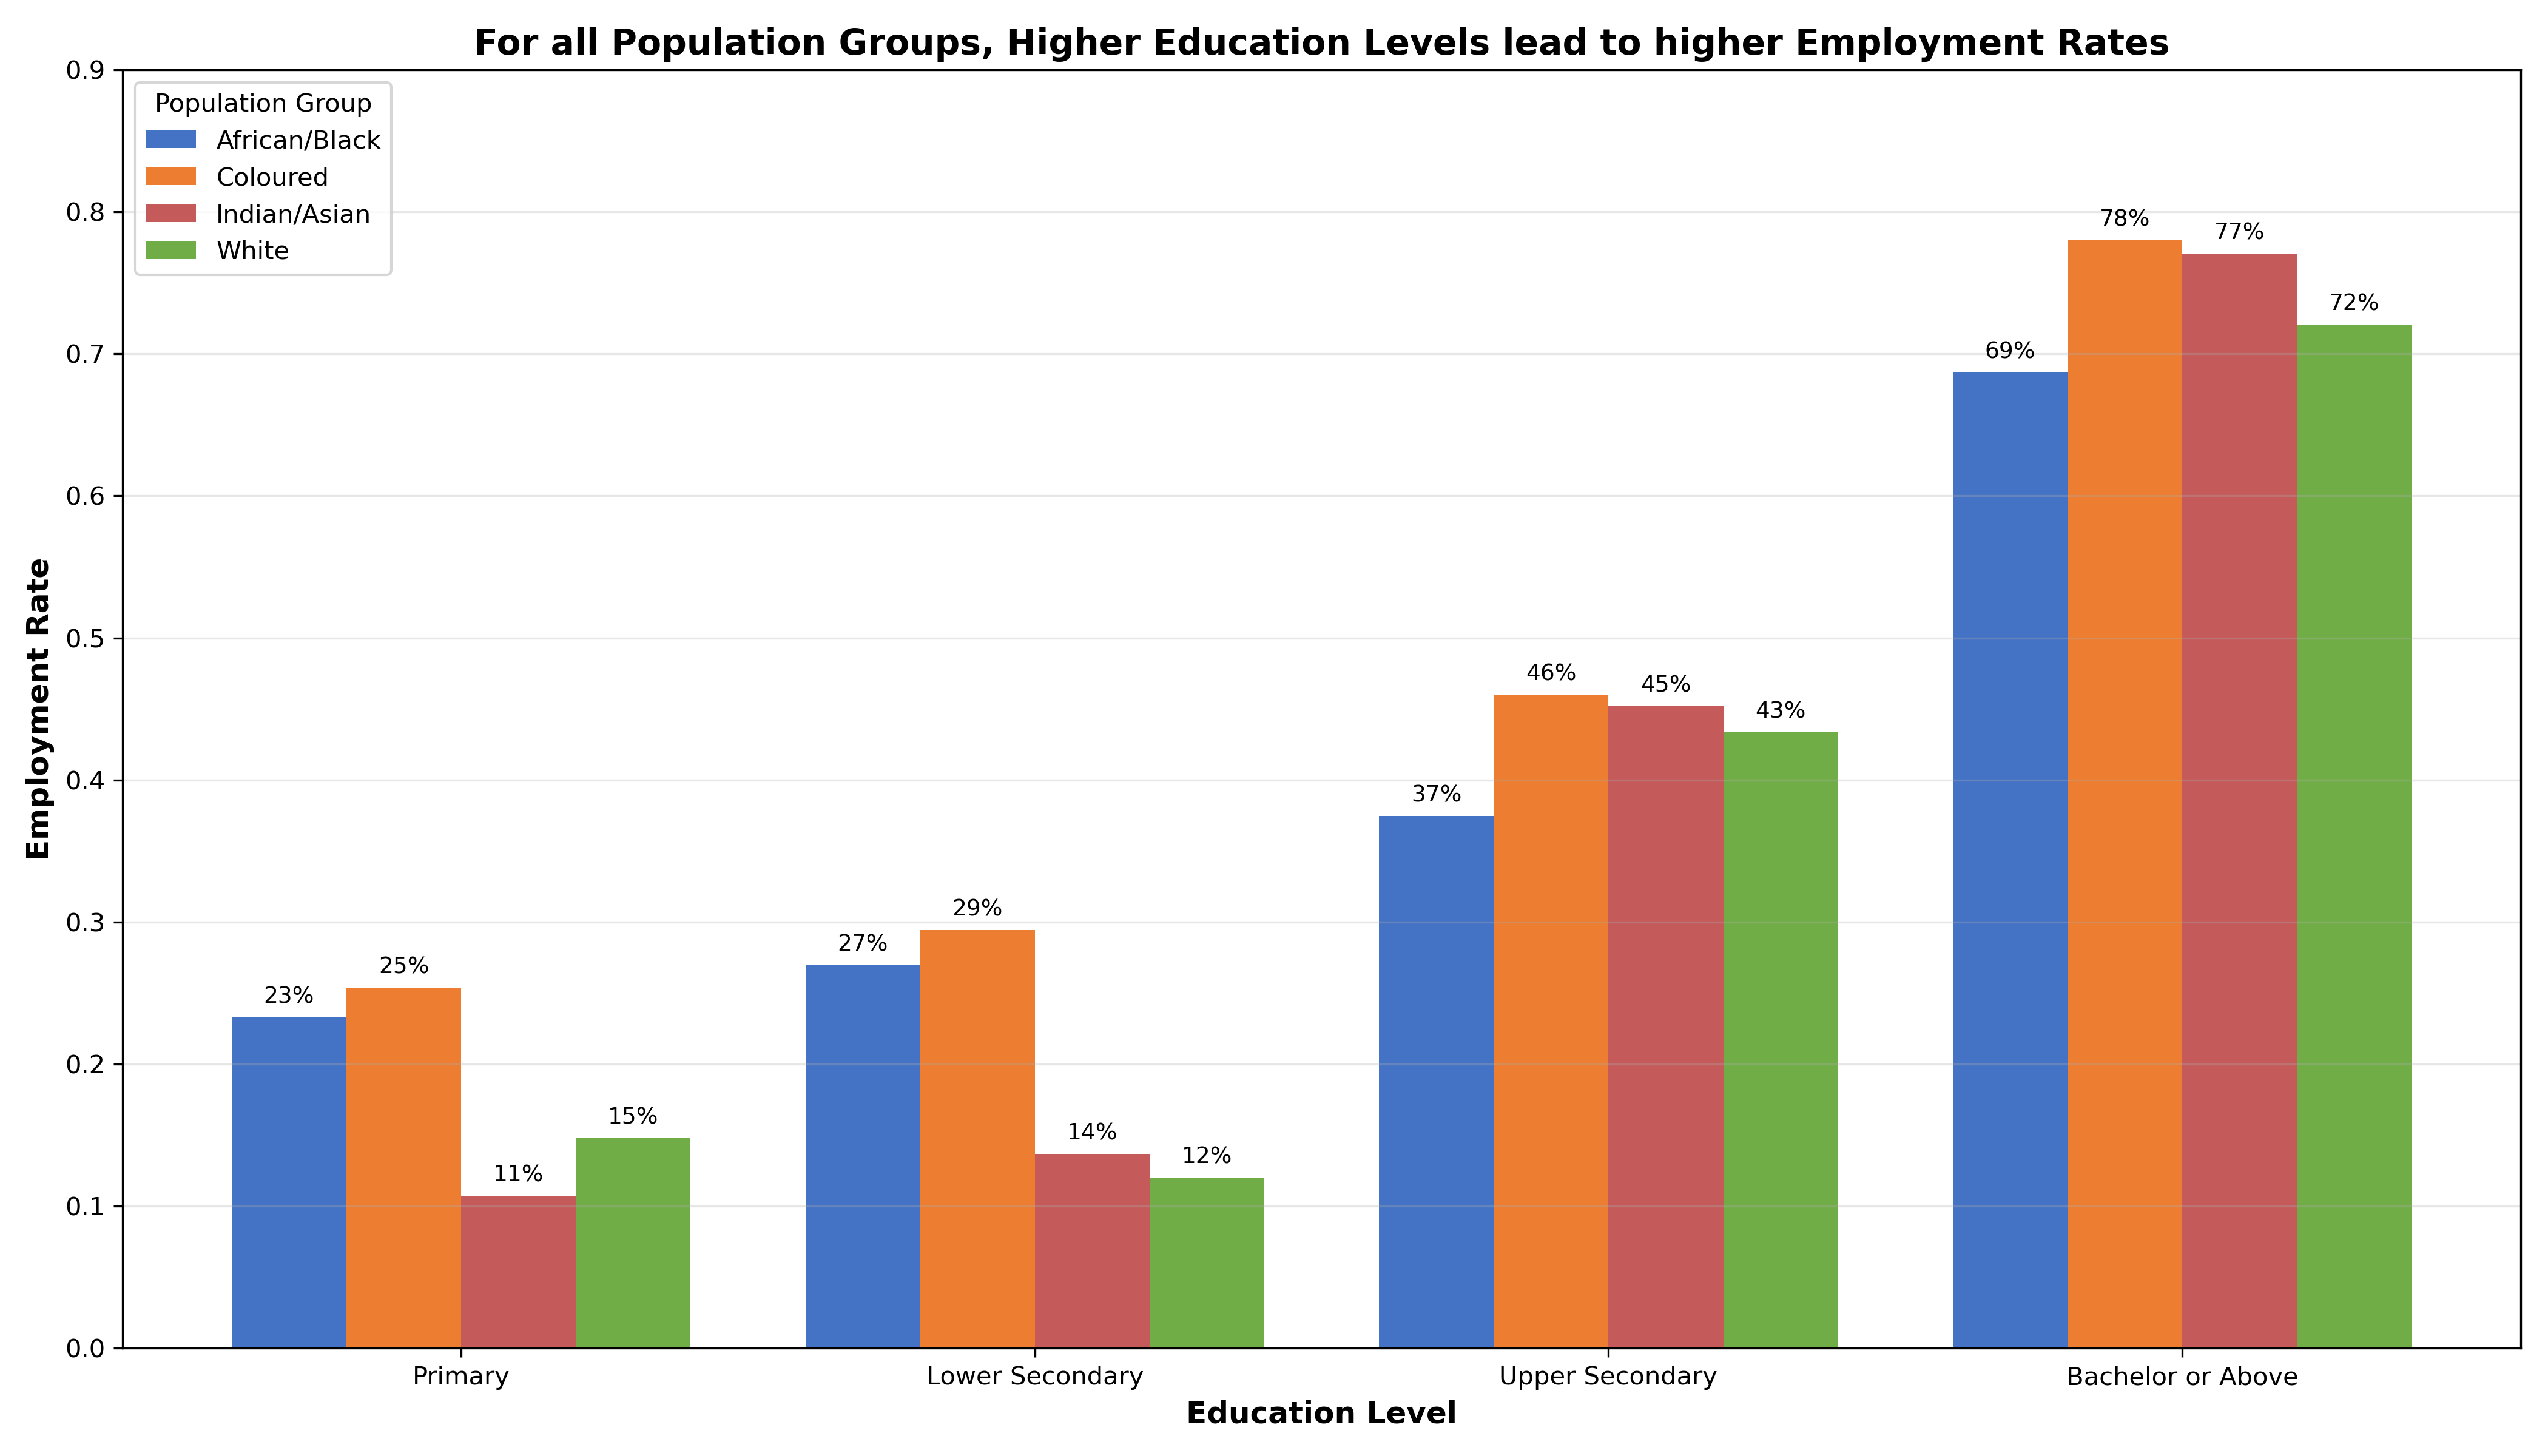

In [14]:
# My original graph
Image('/Users/anialatrofa/Desktop/London School of Economics/Y1/AT/Study Material/PP422/Python/Data/W4 Education and Employment Rates.png')

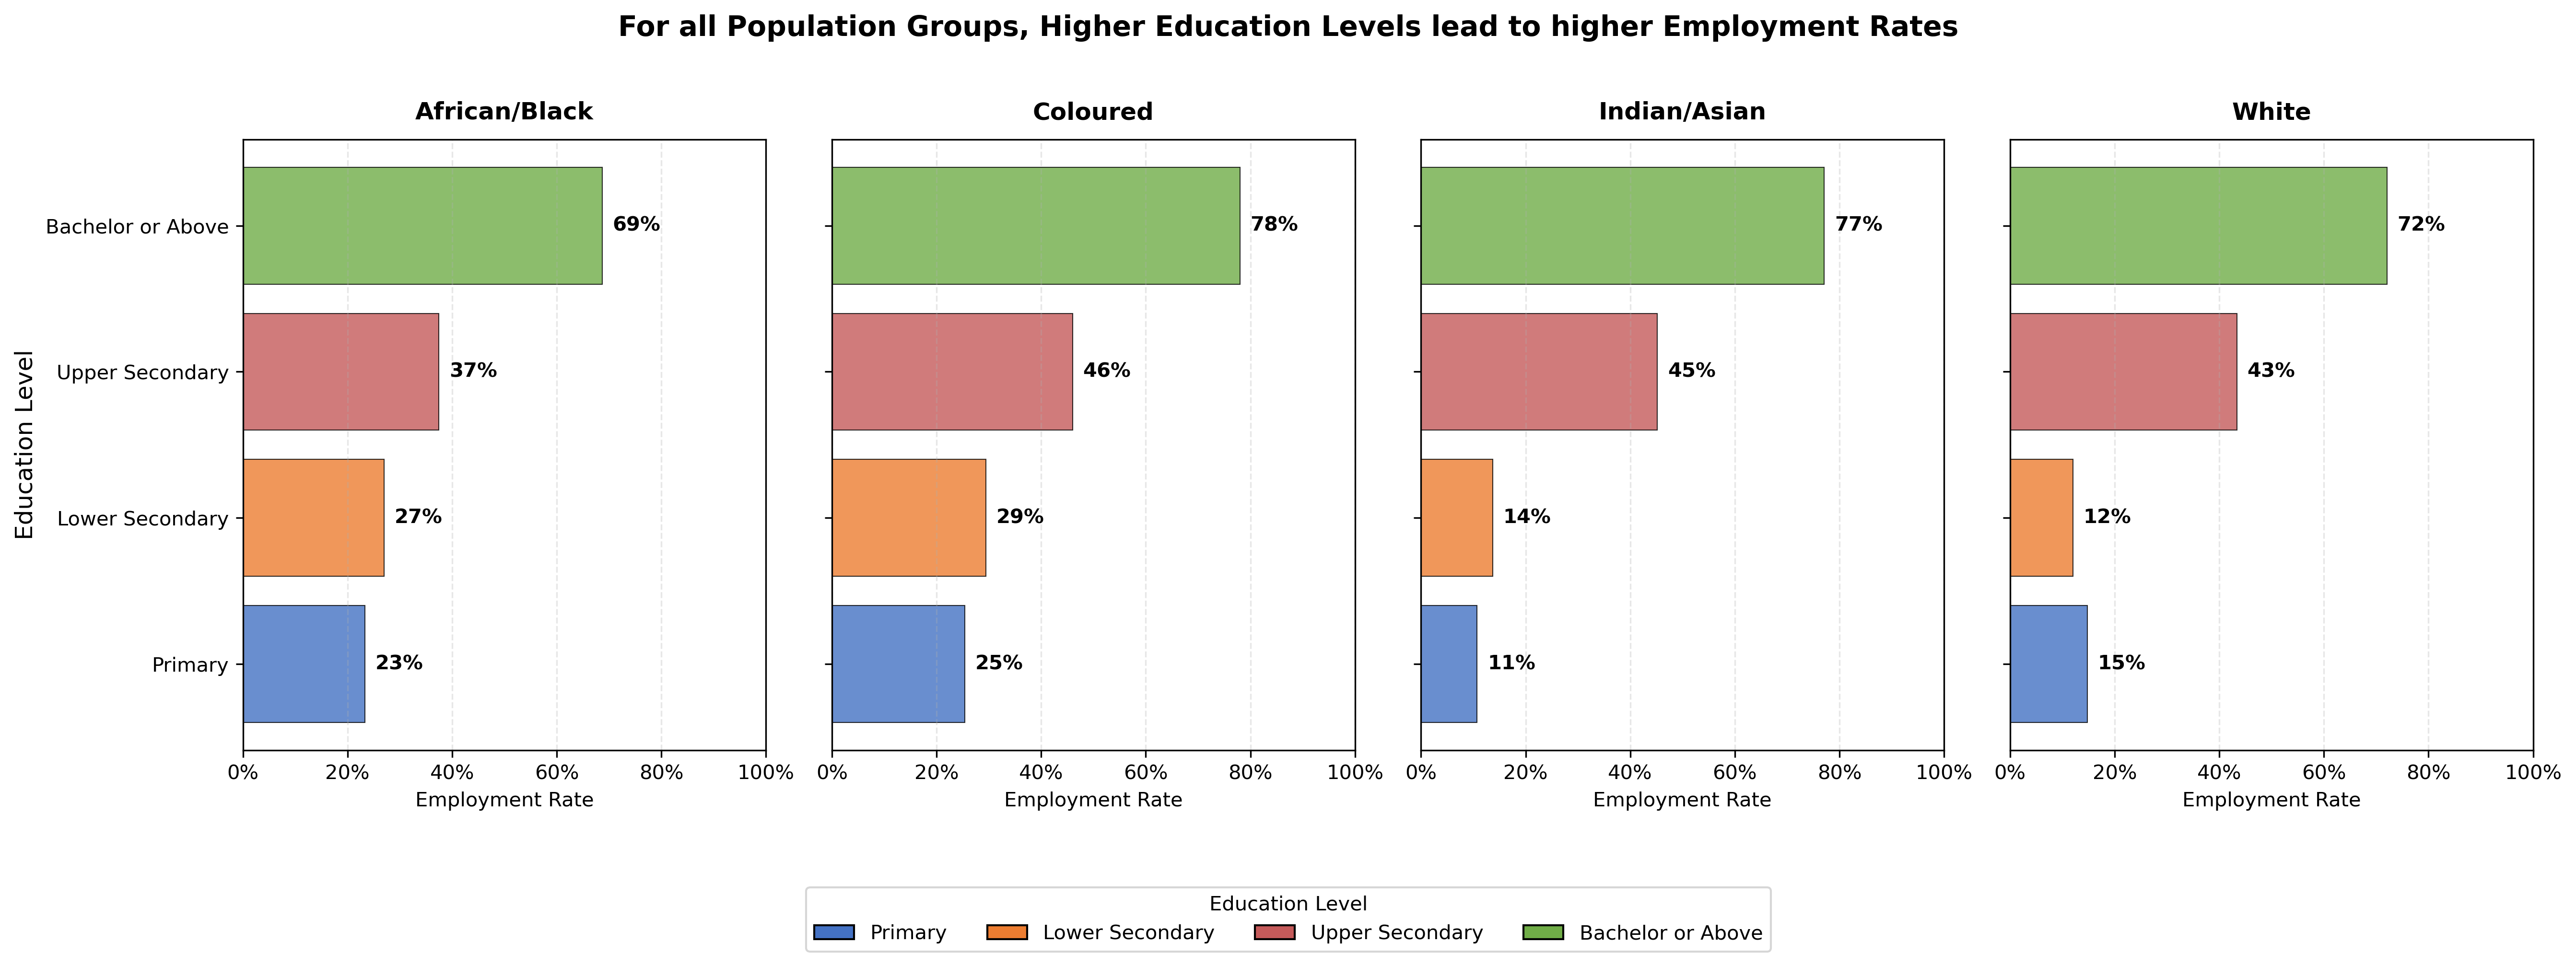

In [15]:
# My updated graph
Image("/Users/anialatrofa/Desktop/London School of Economics/Y1/AT/Study Material/PP422/Python/Data/W4 Education and Employment Rates 2.png")

# Problem 6 - Plot Replication: Women's Safety in India {-}

In September 2024, the _Financial Times_ ran a larger story about the relationship between women's safety, women's economic participation and economic growth in India.

The story references analysis presented by then IMF Managing Director Christine Lagarde indicating that India's GDP would be nearly 30 percent larger if the labour force participation of women were to match that of men.

Part of that story included the below plot examining the percentage of women reporting they feel safe walking alone at night in different countries.

You may read the full story [here](https://www.ft.com/content/eb034596-406d-439f-8c3d-c884d7a9e633).

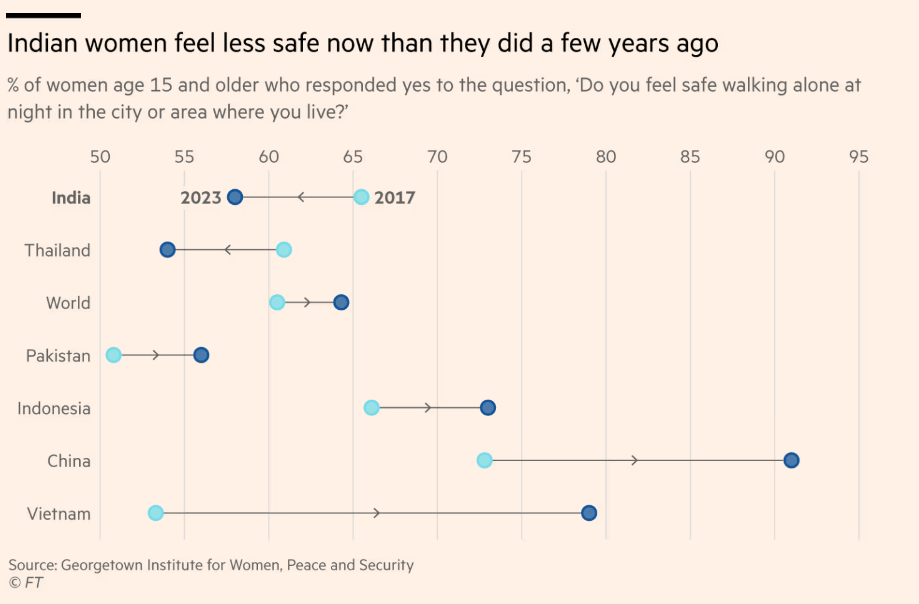

In [16]:
Image('/Users/anialatrofa/Desktop/London School of Economics/Y1/AT/Study Material/PP422/Python/Data/W5 vft_safety_plot.png')

Using the provided `giwps.csv` data set, create a plot of the data that you feel tells a similar story as the plot above. You may follow the above example as a template or you may present the data in an alternative format that you prefer. 

As with all plot replication, your plot should aim to capture the intended spirit or takeaway message, but does not need to imitate precisely every detail. Ensure your plot is clearly labeled and formatted.

If you wish to replicate this plot presentation style, you may find it helpful to search (or ask AI) for "dumbbell plot".


In [17]:
import matplotlib.pyplot as plt

In [18]:
giwps = pd.read_csv('/Users/anialatrofa/Desktop/London School of Economics/Y1/AT/Study Material/PP422/Python/Data/W5 giwps.csv')

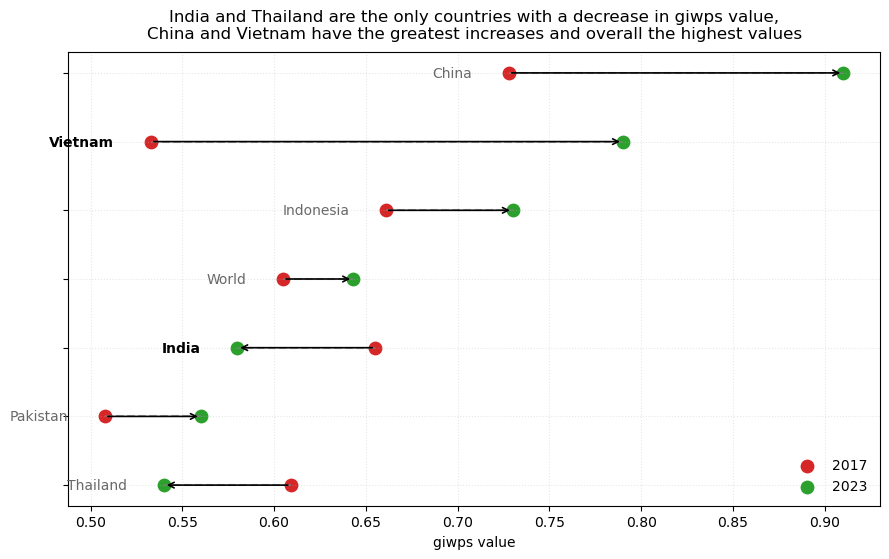

In [21]:
giwps = giwps.sort_values(by="2023")

plt.figure(figsize=(9, 6))

y_pos = range(len(giwps))

for i, (idx, row) in enumerate(giwps.iterrows()):
    country = row["country"]
    val_2017 = row["2017"]
    val_2023 = row["2023"]
    
    plt.plot([val_2017, val_2023], [i, i], color="gray", linestyle="--", alpha=0.6)
    plt.scatter(val_2017, i, color="tab:red", s=80, label="2017" if i == 0 else "")
    plt.scatter(val_2023, i, color="tab:green", s=80, label="2023" if i == 0 else "")
    plt.annotate("",
                 xy=(val_2023, i),
                 xytext=(val_2017, i),
                 arrowprops=dict(arrowstyle="->", color="black", lw=1.2))
    
    # 🔹 Qui dentro: evidenzia India e China in grassetto
    if country in ["India", "Vietnam"]:
        plt.text(min(val_2017, val_2023) - 0.02, i, country, va="center", ha="right",
                 fontsize=10, fontweight="bold", color="black")
    else:
        plt.text(min(val_2017, val_2023) - 0.02, i, country, va="center", ha="right",
                 fontsize=10, color="dimgray")

# Titolo e assi
plt.title("India and Thailand are the only countries with a decrease in giwps value,\n"
          "China and Vietnam have the greatest increases and overall the highest values",
          fontsize=12, pad=10)

plt.xlabel("giwps value")
plt.yticks(y_pos, [""] * len(giwps))
plt.legend(frameon=False, loc="lower right")
plt.grid(alpha=0.3, linestyle=":")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('giwps_comparison.png', dpi=300, bbox_inches='tight')

plt.show()

In [20]:
from scipy.stats import binom
! jupyter nbconvert --to html PS5.ipynb --no-prompt

[NbConvertApp] Converting notebook PS5.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 4 image(s).
[NbConvertApp] Writing 1209856 bytes to PS5.html
